# **Machine learning Experiment-7**
## **K Nearest Neighbours**

Dhruv Kangavkar- 1032221800

Batch-G1

ECE-AIML B

Date-29/8/24

# **Post-lab questions:**
###Q) State applications of k-NN algorithm.
1. **Classification Image recognition:** Identifying objects or people in images based on their visual features.
Character recognition: Recognizing handwritten or printed characters.
Document classification: Categorizing documents into topics or genres.
Medical diagnosis: Predicting diseases based on patient symptoms and medical history.
Customer segmentation: Grouping customers based on their behaviors or preferences.
2. **Regression Predicting house prices:** Estimating the price of a house based on its features (e.g., size, location, number of bedrooms).
Stock price prediction: Forecasting the future price of a stock based on historical data.
Sales forecasting: Predicting future sales of a product.
3. **Recommendation Systems Product recommendations:** Suggesting products to users based on their past purchases or preferences.
Movie recommendations: Recommending movies to users based on their ratings or viewing history.
Music recommendations: Suggesting music to users based on their listening habits.
4. **Anomaly Detection Fraud detection:** Identifying unusual transactions that might be fraudulent.
Network intrusion detection: Detecting abnormal network traffic that might indicate an attack.
Machine maintenance: Predicting when a machine might fail based on sensor data.
5. **Pattern Recognition Handwriting recognition:** Recognizing handwritten text.
Fingerprint recognition: Identifying individuals based on their fingerprints.
Facial recognition: Identifying individuals based on their facial features.
6. **Data Mining Clustering:** Grouping similar data points together.
Association rule mining: Discovering relationships between items in a dataset.


# **Conclusion:**

In this experiment, we built and evaluated a K-Nearest Neighbors (KNN) classifier for obesity classification using physical, behavioral, and dietary features. After handling missing data, outliers, and categorical variables, we standardized the features and split the data into training and test sets.

The KNN model was trained using 5 neighbors, and decision boundaries were plotted for two selected features to visualize the model's classification performance. The model effectively distinguished between obesity-related classes, with better performance when trained on all features rather than just two.

In summary, KNN performed well for this classification task, though further improvements could be made through feature selection and model tuning.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import csv
import plotly.express as px
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
import warnings
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
warnings.filterwarnings('ignore')

In [3]:
from google.colab import files
uploaded = files.upload()

# Print the keys in the uploaded dictionary
print("Keys in uploaded:", uploaded.keys())

Saving ObesityDataSet.csv to ObesityDataSet.csv
Keys in uploaded: dict_keys(['ObesityDataSet.csv'])


In [5]:
df = pd.read_csv(io.BytesIO(uploaded['ObesityDataSet.csv']))

In [8]:
# Checking for NA values
print(df.isna().sum())

Gender                            0
Age                               0
Height                            0
Weight                            0
family_history_with_overweight    0
FAVC                              0
FCVC                              0
NCP                               0
CAEC                              0
SMOKE                             0
CH2O                              0
SCC                               0
FAF                               0
TUE                               0
CALC                              0
MTRANS                            0
NObeyesdad                        0
dtype: int64


In [9]:
# Define a function to replace outliers
def replace_outliers(col):
    Q1 = col.quantile(0.25)
    Q3 = col.quantile(0.75)
    IQR = Q3 - Q1
    LL = Q1 - 1.5 * IQR
    UL = Q3 + 1.5 * IQR
    return col.clip(lower=LL, upper=UL)

# Apply the function to the numeric columns
df[['Age', 'Height', 'Weight']] = df[['Age', 'Height', 'Weight']].apply(replace_outliers)


In [10]:
from sklearn.preprocessing import LabelEncoder

# Apply Label Encoding on 'NObeyesdad'
label_encoder = LabelEncoder()
df['NObeyesdad'] = label_encoder.fit_transform(df['NObeyesdad'])


In [11]:
# Convert categorical columns to dummy variables
df = pd.get_dummies(df, drop_first=True)


In [12]:
from sklearn.preprocessing import StandardScaler

# Define the columns to scale (usually numeric columns)
scaler = StandardScaler()
df[['Age', 'Height', 'Weight']] = scaler.fit_transform(df[['Age', 'Height', 'Weight']])


In [13]:
from sklearn.model_selection import train_test_split

# Assuming 'NObeyesdad' is the target column
X = df.drop(columns=['NObeyesdad'])
y = df['NObeyesdad']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [14]:
from sklearn.neighbors import KNeighborsClassifier


In [15]:
# Create the KNeighbors Classifier object
knn = KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)


In [16]:
# Train the KNeighbors Classifier model
knn.fit(X_train, y_train)


KNeighborsClassifier()

In [17]:
# Predicting using the test data
y_pred = knn.predict(X_test)


In [18]:
from sklearn.metrics import classification_report

# Print the classification report
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       0.79      0.96      0.87        56
           1       0.79      0.44      0.56        62
           2       0.83      0.95      0.89        78
           3       0.97      0.97      0.97        58
           4       1.00      1.00      1.00        63
           5       0.78      0.84      0.81        56
           6       0.82      0.84      0.83        50

    accuracy                           0.86       423
   macro avg       0.86      0.86      0.85       423
weighted avg       0.86      0.86      0.85       423



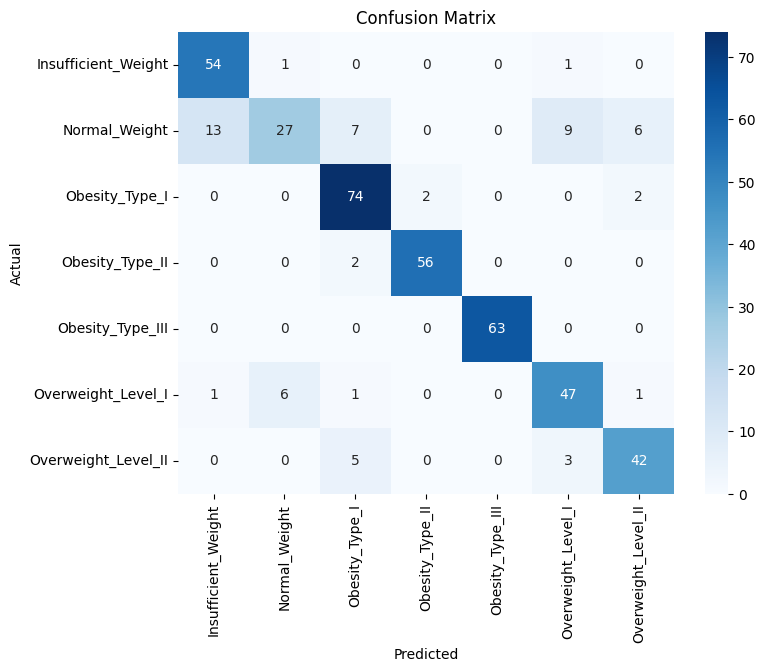

In [19]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Plot the confusion matrix
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=label_encoder.classes_, yticklabels=label_encoder.classes_)
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


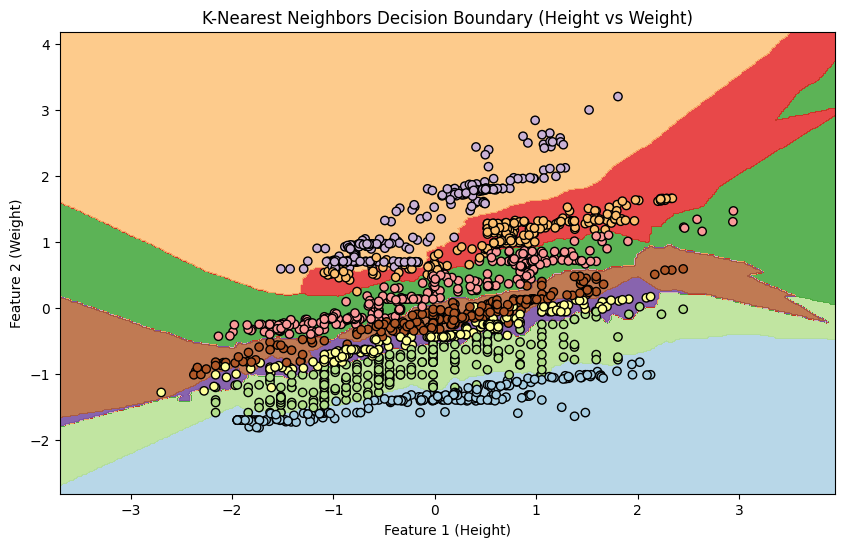

In [23]:
#KNeighbors Classifier model using only two features for visualization
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Choose two features (replace 'Feature1' and 'Feature2' with the actual feature names)
X_2d = df[['Height', 'Weight']].values  # Example: choosing 'Height' and 'Weight'
y_2d = df['NObeyesdad']

# Standardize the two features
scaler = StandardScaler()
X_2d = scaler.fit_transform(X_2d)

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X_2d, y_2d, test_size=0.2, random_state=42)

# Train the KNeighbors Classifier on the two features
knn_2d = KNeighborsClassifier(n_neighbors=5)
knn_2d.fit(X_train, y_train)

# Create a mesh of points to plot the decision boundary
h = .02  # Step size in the mesh
x_min, x_max = X_train[:, 0].min() - 1, X_train[:, 0].max() + 1
y_min, y_max = X_train[:, 1].min() - 1, X_train[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                     np.arange(y_min, y_max, h))

# Predict the label for each point in the mesh
Z = knn_2d.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot the decision boundary
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, edgecolors='k', cmap=plt.cm.Paired)
plt.xlabel('Feature 1 (Height)')
plt.ylabel('Feature 2 (Weight)')
plt.title('K-Nearest Neighbors Decision Boundary (Height vs Weight)')
plt.show()
